# TensorFlow Tutorial and Boston Housing Price Prediction from MIT Deep Learning (TBU)

![TensorFlow](https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1229px-TensorFlowLogo.svg.png)

[TensorFlow](https://tensorflow.org)
  
    This kernel has Boston Housing Price Prediction from MIT Deep Learning by Lex Fridman and TensorFlow tutorial for Beginners with Latest APIs that was designed by Aymeric Damien for easily diving into TensorFlow, through examples. For readability, it includes both notebooks and source codes with explanation.

> #### **Credits**: Thanks to **Lex Fridman's MIT Deep Learning**, **Aymeric Damien** and other contributers for such wonderful work!

### Here are some of *my kernel notebooks* for **Machine Learning and Data Science** as follows, ***Upvote*** them if you *like* them

> * [Awesome Deep Learning Basics and Resources](https://www.kaggle.com/arunkumarramanan/awesome-deep-learning-resources)
> * [Data Science with R - Awesome Tutorials](https://www.kaggle.com/arunkumarramanan/data-science-with-r-awesome-tutorials)
> * [Data Science and Machine Learning Cheetcheets](https://www.kaggle.com/arunkumarramanan/data-science-and-machine-learning-cheatsheets)
> * [Awesome ML Frameworks and MNIST Classification](https://www.kaggle.com/arunkumarramanan/awesome-machine-learning-ml-frameworks)
> * [Awesome Data Science for Beginners with Titanic Exploration](https://kaggle.com/arunkumarramanan/awesome-data-science-for-beginners)
> * [Data Scientist's Toolkits - Awesome Data Science Resources](https://www.kaggle.com/arunkumarramanan/data-scientist-s-toolkits-awesome-ds-resources)
> * [Awesome Computer Vision Resources (TBU)](https://www.kaggle.com/arunkumarramanan/awesome-computer-vision-resources-to-be-updated)
> * [Machine Learning and Deep Learning - Awesome Tutorials](https://www.kaggle.com/arunkumarramanan/awesome-deep-learning-ml-tutorials)
> * [Data Science with Python - Awesome Tutorials](https://www.kaggle.com/arunkumarramanan/data-science-with-python-awesome-tutorials)
> * [Awesome TensorFlow and PyTorch Resources](https://www.kaggle.com/arunkumarramanan/awesome-tensorflow-and-pytorch-resources)
> * [Awesome Data Science IPython Notebooks](https://www.kaggle.com/arunkumarramanan/awesome-data-science-ipython-notebooks)
> * [Machine Learning Engineer's Toolkit with Roadmap](https://www.kaggle.com/arunkumarramanan/machine-learning-engineer-s-toolkit-with-roadmap) 
> * [Hands-on ML with scikit-learn and TensorFlow](https://www.kaggle.com/arunkumarramanan/hands-on-ml-with-scikit-learn-and-tensorflow)
> * [Practical Machine Learning with PyTorch](https://www.kaggle.com/arunkumarramanan/practical-machine-learning-with-pytorch)
> * [Tensorflow Tutorial and House Price Prediction](https://www.kaggle.com/arunkumarramanan/tensorflow-tutorial-and-examples)

 ###### Machine Learning ML Crash Course with TensorFlow APIs is highly recommended by Google as it's developed by googlers.
 
 * [Google Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/)

## Boston Housing Price Prediction with Feed Forward Neural Networks from MIT Deep Learning

Let's start with using a fully-connected neural network to do predict housing prices. The following image highlights the difference between regression and classification (see part 2). Given an observation as input, **regression** outputs a continuous value (e.g., exact temperature) and classificaiton outputs a class/category that the observation belongs to.

<img src="https://i.imgur.com/vvSoAzg.jpg" alt="classification_regression" width="400"/>

For the Boston housing dataset, we get 506 rows of data, with 13 features in each. Our task is to build a regression model that takes these 13 features as input and output a single value prediction of the "median value of owner-occupied homes (in $1000)."

Now, we load the dataset. Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

  [tf.keras](https://www.tensorflow.org/guide/keras) is the simplest way to build and train neural network models in TensorFlow. So, that's what we'll stick with in this tutorial, unless the models neccessitate a lower-level API.

Note that there's [tf.keras](https://www.tensorflow.org/guide/keras) (comes with TensorFlow) and there's [Keras](https://keras.io/) (standalone). 

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

1.12.0


In [2]:
# Set common constants
this_repo_url = 'https://github.com/arunkumarramanan/mit-deep-learning/raw/master/'
this_tutorial_url = this_repo_url + 'tutorial_deep_learning_basics'

In [3]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

57344/57026 [==============================] - 0s 0us/step


### Build the model

Building the neural network requires configuring the layers of the model, then compiling the model. First we stack a few layers together using `keras.Sequential`. Next we configure the loss function, optimizer, and metrics to monitor. These are added during the model's compile step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps.

Let's build a network with 1 hidden layer of 20 neurons, and use mean squared error (MSE) as the loss function (most common one for regression problems):

In [4]:
def build_model():
    model = keras.Sequential([
        Dense(20, activation=tf.nn.relu, input_shape=[len(train_features[0])]),
        Dense(1)
    ])

    model.compile(optimizer=tf.train.AdamOptimizer(), 
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_features` and `train_labels` arrays.
2. The model learns to associate features and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_features` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [5]:
# this helps makes our output less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show RMSE measure to compare to Kaggle leaderboard on https://www.kaggle.com/c/boston-housing/leaderboard
rmse_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.......................................................................................
Fi

Now, let's plot the loss function measure on the training and validation sets. The validation set is used to prevent overfitting ([learn more about it here](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)). However, because our network is small, the training convergence without noticeably overfitting the data as the plot shows.

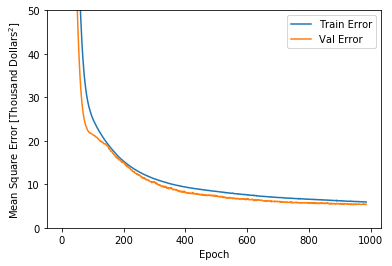

In [6]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,50])

plot_history()

Next, compare how the model performs on the test dataset:

In [7]:
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

102/102 [==============================] - 0s 121us/step
Root Mean Square Error on test set: 4.144


Compare the RMSE measure you get to the [Kaggle leaderboard](https://www.kaggle.com/c/boston-housing/leaderboard). An RMSE of 2.651 puts us in 5th place.

## Acknowledgements

The contents of this tutorial is based on and inspired by the work of [TensorFlow team](https://www.tensorflow.org) (see their [Colab notebooks](https://www.tensorflow.org/tutorials/)), our [MIT Human-Centered AI team](https://hcai.mit.edu), and individual pieces referenced in the [MIT Deep Learning](https://deeplearning.mit.edu) course slides.

# TensorFlow Tutorial and Examples

It is suitable for beginners who want to find clear and concise examples about TensorFlow. Besides the traditional 'raw' TensorFlow implementations, you can also find the latest TensorFlow API practices (such as `layers`, `estimator`, `dataset`, ...).

## Tutorial index

#### 0 - Prerequisite
- [Introduction to Machine Learning](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/0_Prerequisite/ml_introduction.ipynb).
- [Introduction to MNIST Dataset](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/0_Prerequisite/mnist_dataset_intro.ipynb).

#### 1 - Introduction
- **Hello World** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/1_Introduction/helloworld.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/1_Introduction/helloworld.py)). Very simple example to learn how to print "hello world" using TensorFlow.
- **Basic Operations** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/1_Introduction/basic_operations.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/1_Introduction/basic_operations.py)). A simple example that cover TensorFlow basic operations.
- **TensorFlow Eager API basics** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/1_Introduction/basic_eager_api.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/1_Introduction/basic_eager_api.py)). Get started with TensorFlow's Eager API.

#### 2 - Basic Models
- **Linear Regression** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/linear_regression.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/linear_regression.py)). Implement a Linear Regression with TensorFlow.
- **Linear Regression (eager api)** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/linear_regression_eager_api.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/linear_regression_eager_api.py)). Implement a Linear Regression using TensorFlow's Eager API.
- **Logistic Regression** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/logistic_regression.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/logistic_regression.py)). Implement a Logistic Regression with TensorFlow.
- **Logistic Regression (eager api)** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/logistic_regression_eager_api.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/logistic_regression_eager_api.py)). Implement a Logistic Regression using TensorFlow's Eager API.
- **Nearest Neighbor** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/nearest_neighbor.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/nearest_neighbor.py)). Implement Nearest Neighbor algorithm with TensorFlow.
- **K-Means** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/kmeans.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/kmeans.py)). Build a K-Means classifier with TensorFlow.
- **Random Forest** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/random_forest.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/random_forest.py)). Build a Random Forest classifier with TensorFlow.
- **Gradient Boosted Decision Tree (GBDT)** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/gradient_boosted_decision_tree.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/gradient_boosted_decision_tree.py)). Build a Gradient Boosted Decision Tree (GBDT) with TensorFlow.
- **Word2Vec (Word Embedding)** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/word2vec.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/word2vec.py)). Build a Word Embedding Model (Word2Vec) from Wikipedia data, with TensorFlow.

#### 3 - Neural Networks
##### Supervised

- **Simple Neural Network** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/neural_network_raw.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/neural_network_raw.py)). Build a simple neural network (a.k.a Multi-layer Perceptron) to classify MNIST digits dataset. Raw TensorFlow implementation.
- **Simple Neural Network (tf.layers/estimator api)** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/neural_network.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/neural_network.py)). Use TensorFlow 'layers' and 'estimator' API to build a simple neural network (a.k.a Multi-layer Perceptron) to classify MNIST digits dataset.
- **Simple Neural Network (eager api)** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/neural_network_eager_api.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/neural_network_eager_api.py)). Use TensorFlow Eager API to build a simple neural network (a.k.a Multi-layer Perceptron) to classify MNIST digits dataset.
- **Convolutional Neural Network** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/convolutional_network_raw.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/convolutional_network_raw.py)). Build a convolutional neural network to classify MNIST digits dataset. Raw TensorFlow implementation.
- **Convolutional Neural Network (tf.layers/estimator api)** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/convolutional_network.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/convolutional_network.py)). Use TensorFlow 'layers' and 'estimator' API to build a convolutional neural network to classify MNIST digits dataset.
- **Recurrent Neural Network (LSTM)** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/recurrent_network.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/recurrent_network.py)). Build a recurrent neural network (LSTM) to classify MNIST digits dataset.
- **Bi-directional Recurrent Neural Network (LSTM)** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/bidirectional_rnn.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/bidirectional_rnn.py)). Build a bi-directional recurrent neural network (LSTM) to classify MNIST digits dataset.
- **Dynamic Recurrent Neural Network (LSTM)** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/dynamic_rnn.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/dynamic_rnn.py)). Build a recurrent neural network (LSTM) that performs dynamic calculation to classify sequences of different length.

##### Unsupervised
- **Auto-Encoder** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/autoencoder.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/autoencoder.py)). Build an auto-encoder to encode an image to a lower dimension and re-construct it.
- **Variational Auto-Encoder** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/variational_autoencoder.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/variational_autoencoder.py)). Build a variational auto-encoder (VAE), to encode and generate images from noise.
- **GAN (Generative Adversarial Networks)** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/gan.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/gan.py)). Build a Generative Adversarial Network (GAN) to generate images from noise.
- **DCGAN (Deep Convolutional Generative Adversarial Networks)** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/dcgan.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/dcgan.py)). Build a Deep Convolutional Generative Adversarial Network (DCGAN) to generate images from noise.

#### 4 - Utilities
- **Save and Restore a model** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/4_Utils/save_restore_model.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/4_Utils/save_restore_model.py)). Save and Restore a model with TensorFlow.
- **Tensorboard - Graph and loss visualization** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/4_Utils/tensorboard_basic.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/4_Utils/tensorboard_basic.py)). Use Tensorboard to visualize the computation Graph and plot the loss.
- **Tensorboard - Advanced visualization** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/4_Utils/tensorboard_advanced.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/4_Utils/tensorboard_advanced.py)). Going deeper into Tensorboard; visualize the variables, gradients, and more...

#### 5 - Data Management
- **Build an image dataset** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/5_DataManagement/build_an_image_dataset.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/5_DataManagement/build_an_image_dataset.py)). Build your own images dataset with TensorFlow data queues, from image folders or a dataset file.
- **TensorFlow Dataset API** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/5_DataManagement/tensorflow_dataset_api.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/5_DataManagement/tensorflow_dataset_api.py)). Introducing TensorFlow Dataset API for optimizing the input data pipeline.

#### 6 - Multi GPU
- **Basic Operations on multi-GPU** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/6_MultiGPU/multigpu_basics.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/6_MultiGPU/multigpu_basics.py)). A simple example to introduce multi-GPU in TensorFlow.
- **Train a Neural Network on multi-GPU** ([notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/6_MultiGPU/multigpu_cnn.ipynb)) ([code](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/6_MultiGPU/multigpu_cnn.py)). A clear and simple TensorFlow implementation to train a convolutional neural network on multiple GPUs.

## Dataset
Some examples require MNIST dataset for training and testing. Don't worry, this dataset will automatically be downloaded when running examples.
MNIST is a database of handwritten digits, for a quick description of that dataset, you can check [this notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/0_Prerequisite/mnist_dataset_intro.ipynb).

Official Website: [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/)

## More Examples
The following examples are coming from [TFLearn](https://github.com/tflearn/tflearn), a library that provides a simplified interface for TensorFlow. You can have a look, there are many [examples](https://github.com/tflearn/tflearn/tree/master/examples) and [pre-built operations and layers](http://tflearn.org/doc_index/#api).

*If you are using older TensorFlow version (0.11 and under), please take a [look here](https://github.com/aymericdamien/TensorFlow-Examples/tree/0.11).*

### Tutorials
- [TFLearn Quickstart](https://github.com/tflearn/tflearn/blob/master/tutorials/intro/quickstart.md). Learn the basics of TFLearn through a concrete machine learning task. Build and train a deep neural network classifier.

### Examples
- [TFLearn Examples](https://github.com/tflearn/tflearn/blob/master/examples). A large collection of examples using TFLearn.

## Credits (Reference)

> - [Lex Fridman's MIT Deep Learning](https://github.com/lexfridman/mit-deep-learning)
> - [Aymeric Damien](https://github.com/aymericdamien/)
> - [GitHub Awesome Lists Topic](https://github.com/topics/awesome)

## License

[![CC0](http://mirrors.creativecommons.org/presskit/buttons/88x31/svg/cc-zero.svg)](https://creativecommons.org/publicdomain/zero/1.0/)

### Please ***UPVOTE*** my kernel if you like it or wanna fork it.

##### Feedback: If you have any ideas or you want any other content to be added to this curated list, please feel free to make any comments to make it better.
#### I am open to have your *feedback* for improving this ***kernel***
###### Hope you enjoyed this kernel!

### Thanks for visiting my *Kernel* and please *UPVOTE* to stay connected and follow up the *further updates!*